# <center>Computational Literary Science: Exam Project<center> <center>Classroom of the Elite: A Data-Driven Content Analysis<center>

## CotE Data

In [1]:
import sys
print("Python version:")
print (sys.version)

print("\n Version info:")
print (sys.version_info)

Python version:
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]

 Version info:
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


In [2]:
#Imports

import random
import glob
import shutil

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')

import sklearn 
print(sklearn.__version__)

import nltk
print(nltk.__version__)

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import os

RND = 22
np.random.seed(RND)
random.seed(RND)

1.4.2
1.21.5
1.0.2
3.7


In [3]:
data_path_CotE = "C:/Users/morin/OneDrive/Documents/School/CLS-Classroom_of_the_Elite/Presentation/CotE_DatasetNaN.txt"

In [4]:
df = pd.read_csv(data_path_CotE, sep = "\t", encoding = "UTF-8")

In [5]:
df.head()

,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,NaN,1
1,1_1,1.0,Main,Chapter,1.0,2015-05-25,Welcome to my dream-like school life,"Ayanokouji-kun, are you ok? It came. It...",qbomb,NaN,NaN,1
2,1_2,1.0,Main,Chapter,2.0,2015-05-25,The students of class D,"On the second day of school, even though it...",qbomb,NaN,NaN,1
3,1_3,1.0,Main,Chapter,3.0,2015-05-25,"Ladies and gentlemen, thanks for waiting!",Good morning Yamauchi! Good morning Ike! Wh...,qbomb,NaN,NaN,1
4,1_4,1.0,Main,Chapter,4.0,2015-05-25,Friend,"Kikyou-chan, do you want to stop by a cafe...",qbomb,NaN,NaN,1


## PreProcessing

In [6]:
#Removing Punctuation and Stopwords

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english2')
#le=WordNetLemmatizer()

def clean_text(x):
    x = str(x)
    x = x.lower()
    #tokens = word_tokenize(x)
    #x = ' '.join([w for w in tokens if not w in stop_words])
    x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
    tokens = word_tokenize(x)
    x = ' '.join([w for w in tokens if not w in stop_words])
    x = re.sub(r'boys ', 'boy ', x)
    x = re.sub(r'girls ', 'girl ', x)
    x = re.sub(r'students ', 'student ', x)
    x = re.sub(r'volume ', ' ', x) #Word specific to the epilogues but not to the story, better to filter it out
    x = re.sub(r'horikita ', ' ', x) #name used for 2 different characters, used in almost any present every topic if not filtered out
    x = re.sub(r'\d+', ' ', x)
    x = re.sub(r'\n+', ' ', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x


df['Clean_Text'] = df.Text.apply(clean_text)
df['Clean_Text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    bit sudden listen seriously question ask think...
1    ayanokouji ok came came feared situation prete...
2    second day school even though technically firs...
3    good morning yamauchi good morning ike arrivin...
4    kikyou want stop cafe way home un let go ah wa...
Name: Clean_Text, dtype: object

In [7]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df["Text_Len"] = df["Text"].apply(len)
df["Text_Len"]

0        2680
1       58100
2       23881
3       22311
4       18958
        ...  
171     56568
172     72295
173     85384
174    104494
175     12526
Name: Text_Len, Length: 176, dtype: int64

In [9]:
max(df["Text_Len"]) #176240

176240

In [10]:
df["Clean_Text_Len"] = df["Clean_Text"].apply(len)
df["Clean_Text_Len"]

0       1579
1      33549
2      13543
3      13070
4      10313
       ...  
171    31546
172    42541
173    50565
174    57558
175     7273
Name: Clean_Text_Len, Length: 176, dtype: int64

In [11]:
max(df["Clean_Text_Len"]) #104346

102499

## Main Data

In [12]:
df_Main = df[df["Volume_Type"] == "Main"]

In [13]:
df_Main1 = df_Main[df_Main["Chapter_Type"] == "Prologue"]
df_Main2 = df_Main[df_Main["Chapter_Type"] == "Chapter"]
df_Main3 = df_Main[df_Main["Chapter_Type"] == "Epilogue"]
df_Main_ = df_Main1.append(df_Main2, ignore_index=True)
df_Main_ = df_Main_.append(df_Main3, ignore_index=True)
df_Main_.head()

C:\Users\morin\AppData\Local\Temp\ipykernel_11236\1618050120.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Main_ = df_Main1.append(df_Main2, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_11236\1618050120.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Main_ = df_Main_.append(df_Main3, ignore_index=True)


,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester,Clean_Text,Text_Len,Clean_Text_Len
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,NaN,1,bit sudden listen seriously question ask think...,2680,1579
1,2_P,2.0,Main,Prologue,12.0,2015-09-25,The monologue of Sakura Airi,I’m not very good at interacting with other...,qbomb,Candy-Sama,Josh-kun,1,good interacting people good talking people ma...,1202,665
2,3_P,3.0,Main,Prologue,16.0,2016-01-25,Chiyabashira Sae s monologue,There are many stories in Greek Mythology t...,black_miri,NaN,NaN,1,many stories greek mythology include human sus...,2585,1541
3,4_P,4.0,Main,Prologue,22.0,2016-05-25,Karuizawa Kei s Monologue,"In the end, even after I entered this schoo...",Anon from 4chan,NaN,NaN,1,end even entered school nothing changed perhap...,1713,906
4,5_P,5.0,Main,Prologue,34.0,2017-01-25,Sudou Ken s Monologue,"To be honest, I m not a proper human being....",Anon from 4chan,NaN,NaN,2,honest proper human need someone else tell dec...,1235,747


## Pretrain Data: CotE

In [14]:
#STEP 1: Splitting of Subvolumes

df_SubPretrain = df[df["Volume_Type"] == "Sub"]

In [15]:
#STEP 2: Splitting of Bonus Chapters and Afterwords

df_BonusPretrain1 = df_Main[df_Main["Chapter_Type"] == "Bonus"]
df_BonusPretrain2 = df_Main[df_Main["Chapter_Type"] == "Afterword"]
df_BonusPretrain = df_BonusPretrain1.append(df_BonusPretrain2, ignore_index=True)
df_BonusPretrain.head()

C:\Users\morin\AppData\Local\Temp\ipykernel_11236\3620367066.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_BonusPretrain = df_BonusPretrain1.append(df_BonusPretrain2, ignore_index=True)


,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester,Clean_Text,Text_Len,Clean_Text_Len
0,10_B1,10.0,Main,Bonus,NaN,2019-01-25,Ichinose Honami Short Story: Apparent Diffi...,A short distance from the dorms. I was stan...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,short distance dorms standing shadow vending m...,3227,1950
1,10_B2,10.0,Main,Bonus,NaN,2019-01-25,Horikita Suzune Short Story: Neighbour,He walked past me and stood in front of Kou...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,walked past stood front kouenji seems talking ...,3063,1763
2,10_B3,10.0,Main,Bonus,NaN,2019-01-25,Sakayanagi Arisu Short Story,A space for only me and Ayanokouji was spre...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,space ayanokouji spreading eyes wearing usual ...,2497,1391
3,10_B4,10.0,Main,Bonus,NaN,2019-01-25,Ichinose Honami Short Story: Small Heartbea...,The time crept closer towards midnight. I’v...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,time crept closer towards midnight hanging aro...,1956,1077
4,11_B1,11.0,Main,Bonus,NaN,2019-05-25,Sakayanagi Arisu (Tapestry) Short Story: Th...,I was deep at sleep. The appearances of mys...,"Confused Translations, Alice (Cinnamon)",christmas_cavalier,NaN,3,deep sleep appearances young repeatedly projec...,1763,1060


In [16]:
df_Pretrain = df_SubPretrain.append(df_BonusPretrain, ignore_index=True)
df_Pretrain.head()

C:\Users\morin\AppData\Local\Temp\ipykernel_11236\4126994811.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Pretrain = df_SubPretrain.append(df_BonusPretrain, ignore_index=True)


,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester,Clean_Text,Text_Len,Clean_Text_Len
0,4.5_P,4.5,Sub,Prologue,27.0,2016-09-23,Even so the Summer Vacation heads towards i...,Sazae-san syndrome. I wonder if you ve hear...,Anon from 4chan,NaN,NaN,Vacation,sazae syndrome wonder heard word explain simpl...,1801,1046
1,4.5_1,4.5,Sub,Chapter,28.0,2016-09-23,Ibuki Mio is surprisingly a person with com...,PART_1 Special exam. The first thing tha...,Anon from 4chan,Nan,NaN,Vacation,part special exam first thing comes mind upon ...,77053,44062
2,4.5_2,4.5,Sub,Chapter,29.0,2016-09-23,Katsuragi Kohei is surprisingly troubled,"PART_1 A lot of the time, I think Japane...",Anon from 4chan,NaN,NaN,Vacation,part lot time think japanese people tolerant r...,112390,63730
3,4.5_3,4.5,Sub,Chapter,30.0,2016-09-23,"Even then, there is danger lurking in daily...",PART_1 It all began with a sudden incide...,Anon from 4chan,NaN,NaN,Vacation,part began sudden incident clock evening certa...,45986,24907
4,4.5_4,4.5,Sub,Chapter,31.0,2016-09-23,A Day of Disaster and Girl Troubles. A Devi...,PART_1 Today I ll be making you coopera...,Anon from 4chan,NaN,NaN,Vacation,part today making cooperate ayanokouji first t...,37704,20892


In [17]:
def count_tokens(df_textcolumn_text):
    """Count tokens in text column"""
    n_tokens = 0

    tokenlist = df_textcolumn_text.split()
    n_tokens = len(tokenlist)

    return n_tokens

In [18]:
df_Pretrain['tokencount'] = df_Pretrain["Text"].apply(count_tokens)
df_Pretrain['tokencount']

0       337
1     14463
2     21334
3      8865
4      7154
      ...  
56      412
57      422
58      307
59      419
60      281
Name: tokencount, Length: 61, dtype: int64

In [19]:
TokenCountPretrain = sum(df_Pretrain['tokencount'])
TokenCountPretrain

193177

In [20]:
DocLenPretrain = len(df_Pretrain["Text"]) #61 text documents
DocLenPretrain

61

In [21]:
#Selecting Clean Text only
df_Pretrain = df_Pretrain[["Clean_Text"]]
df_Pretrain.head()

,Clean_Text
0,sazae syndrome wonder heard word explain simpl...
1,part special exam first thing comes mind upon ...
2,part lot time think japanese people tolerant r...
3,part began sudden incident clock evening certa...
4,part today making cooperate ayanokouji first t...


## Pretraining Data: Gutenberg Selection

In [22]:
#Defining the Project Gutenberg, School Stories Bookshelf pretraining data
data_path_gutenberg = "C:/Users/morin/OneDrive/Documents/School/CLS-Classroom_of_the_Elite/Presentation/TrainingData/School_Stories(Bookshelf)_gutenberg.txt"

df_gutenberg_selection = pd.read_csv(data_path_gutenberg, sep = "\t", encoding = "UTF-8")

df_gutenberg_selection.head()

,Filename,Author,Title,Text
0,PG24025_tokens,Angela Brazil,The New Girl at St. Chad's: A Story of School ...,illustration a chance for retaliation transcri...
1,PG21687_tokens,Angela Brazil,The Youngest Girl in the Fifth: A School Story,online distributed proofreading team at http i...
2,PG21656_tokens,Angela Brazil,The Princess of the School,illustration i come to say to you sis the prin...
3,PG18505_tokens,Angela Brazil,A Popular Schoolgirl,online distributed proofreading team http note...
4,PG18019_tokens,Angela Brazil,The Luckiest Girl in the School,online distributed proofreading team http note...


In [23]:
df_gutenberg_selection = df_gutenberg_selection[['Text']]
df_gutenberg_selection.head()

,Text
0,illustration a chance for retaliation transcri...
1,online distributed proofreading team at http i...
2,illustration i come to say to you sis the prin...
3,online distributed proofreading team http note...
4,online distributed proofreading team http note...


In [24]:
#Checking for missing data
df_gutenberg_selection['Text'].isnull().sum()

0

In [25]:
DocLen_gutenberg_selection = len(df_gutenberg_selection) #23 documents
DocLen_gutenberg_selection

23

In [26]:
df_gutenberg_selection['tokencount'] = df_gutenberg_selection["Text"].apply(count_tokens)
TokenCount_gutenberg_selection = sum(df_gutenberg_selection['tokencount'])
TokenCount_gutenberg_selection

1402919

In [27]:
#Removing punctuation and stopwords

df_gutenberg_selection['Clean_Text'] = df_gutenberg_selection.Text.apply(clean_text)
df_gutenberg_selection['Clean_Text'].head()

0    illustration chance retaliation transcriber no...
1    online distributed proofreading team http illu...
2    illustration come say sis princess school ange...
3    online distributed proofreading team http note...
4    online distributed proofreading team http note...
Name: Clean_Text, dtype: object

In [28]:
df_gutenberg_selection = df_gutenberg_selection[['Clean_Text']]
df_gutenberg_selection.head()

,Clean_Text
0,illustration chance retaliation transcriber no...
1,online distributed proofreading team http illu...
2,illustration come say sis princess school ange...
3,online distributed proofreading team http note...
4,online distributed proofreading team http note...


## Pretraining Data: Merge

In [29]:
#Combining pretraining data (1) CotE Bonus Chapters, Afterwords and subvolumes with (2) Project Gutenberg, School Stories Bookshelf
df_pretrain = df_Pretrain.append(df_gutenberg_selection, ignore_index=True)
df_pretrain

C:\Users\morin\AppData\Local\Temp\ipykernel_11236\2970083254.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pretrain = df_Pretrain.append(df_gutenberg_selection, ignore_index=True)


,Clean_Text
0,sazae syndrome wonder heard word explain simpl...
1,part special exam first thing comes mind upon ...
2,part lot time think japanese people tolerant r...
3,part began sudden incident clock evening certa...
4,part today making cooperate ayanokouji first t...
...,...
79,little men life plumfield jo boy louisa may al...
80,etext prepared thomas nelson sons edition tom ...
81,jean webster copyright century company blue we...
82,little princess frances hodgson burnett little...


In [30]:
TokenCountPretrain + TokenCount_gutenberg_selection #1,596,096 tokens #CotE = 193,177 #GutenbergSelection = 1,402,919

1596096

In [31]:
DocLenPretrain + DocLen_gutenberg_selection #84 documents #CotE = 61 #GutenbergSelection = 23

84

## Pretraining Non-Negative Matrix Factorization (NMF) with Pretrain Data

n_features = 10000 # number of most common words
max_df = 0.47 # maximum document frequency, words should not appear in more than 40 per cent of the documents 34 documents
min_df = 13 # minimum document frequency, words should appear in at least 13 out of 84 documents (15%) #CotE is 61 documents
n_topics = 70 # number of topics

n_top_words = 60 # number of characteristic words per topic (viz purposes only)

In [32]:
n_features = 5000 # number of most common words
max_df = 0.50 # maximum document frequency, words should not appear in more than 40 per cent of the documents 34 documents
min_df = 9 # minimum document frequency, words should appear in at least 9 out of 84 documents (10%) #CotE is 61 documents
n_topics = 75 # number of topics

n_top_words = 60 # number of characteristic words per topic (viz purposes only)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=max_df, min_df=min_df,
                             max_features=n_features)

X = vectorizer.fit_transform(df_pretrain["Clean_Text"])

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_ = transformer.fit_transform(X)

In [35]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=n_topics,
          random_state=RND,
          verbose=10, max_iter=100).fit(X_) # fit NMF model with TF-IDF features

C:\Users\morin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


violation: 1.0
violation: 0.2822081849926561
violation: 0.20654299295993767
violation: 0.1526110216415462
violation: 0.10130593210234186
violation: 0.07324933689512145
violation: 0.054117811751901494
violation: 0.04014014473627597
violation: 0.030766266549172496
violation: 0.02566803993144675
violation: 0.021224169133926288
violation: 0.017184854114910615
violation: 0.014342229711852865
violation: 0.012222570115060706
violation: 0.010577642814282504
violation: 0.00906359444701099
violation: 0.008063739628025918
violation: 0.007389795722006527
violation: 0.006918409028751915
violation: 0.00659502869915489
violation: 0.006329410682421396
violation: 0.0060218310368926505
violation: 0.005691601679648679
violation: 0.00539662266628961
violation: 0.0051327992735853275
violation: 0.004871516134204625
violation: 0.004647262030182518
violation: 0.00441360619453015
violation: 0.004183301580666257
violation: 0.00399173371193578
violation: 0.0038254440369421662
violation: 0.003681669021572876
viol

In [36]:
#Visualisation of Pretraining Topics

for topic_idx, topic in enumerate(nmf.components_):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names_out())[top_idxs] # get words that correspond to topic_idxs
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: study - man - league - house - ye - bat - mill - door - match - play
topic 1: ichinose - ryuuen - points - relationship - lost - elevator - strategy - exam - classmates - mall
topic 2: miss - child - indian - gentleman - princess - hungry - door - monkey - papa - attic
topic 3: kiyotaka - date - love - double - ahh - hirata - calling - inside - realized - romance
topic 4: senpai - ayanokouji - beach - win - flag - wash - miss - staring - water - victory
topic 5: pages - social - dull - months - write - writing - main - finished - completely - skills
topic 6: sudou - ike - yamauchi - council - birthday - kushida - pool - present - points - president
topic 7: ayanokouji - invite - join - group - force - attracting - solo - encourage - escaping - predicted
topic 8: karuizawa - nagumo - hirata - date - president - council - double - christmas - senpai - st
topic 9: boy - particularly - accept - ayanokouji - assisted - yamauchi - inner - breaks - expel - kiyotaka
topic 10: brother 

In [37]:
vocabulary = vectorizer.get_feature_names_out()

topic_names = [f'Topic {k+1}' for k in range(n_topics)]

scores = nmf.transform(transformer.transform(vectorizer.transform(df_pretrain["Clean_Text"])))
print(scores.shape)

violation: 1.0
violation: 0.7805638107588856
violation: 0.13763044461761978
violation: 0.036475273954004045
violation: 0.011694338616893124
violation: 0.005035120186977355
violation: 0.002950430764849585
violation: 0.0018750065075244888
violation: 0.0012205654107530666
violation: 0.0007398426917216482
violation: 0.00044456361331803804
violation: 0.00027495253301889244
violation: 0.00020257006133153884
violation: 0.0001366706423474822
violation: 8.880386775220922e-05
Converged at iteration 16
(84, 75)


In [38]:
topic_word_distributions = pd.DataFrame(
    nmf.components_, columns=vocabulary, index=topic_names)
topic_word_distributions.head() #100 rows (topics) × 824 columns (vocabulary)

,aback,abandoned,abilities,ability,abominable,abreast,abroad,abrupt,abruptly,absence,...,yesterday,yield,yielded,york,young,younger,youngest,youth,youths,zeal
Topic 1,0.013405,0.000012,0.009732,0.000000,0.024676,0.0,0.000000,0.000000,0.0,0.028461,...,0.030431,0.011637,0.012873,0.000000,0.089978,0.000000,0.000000,0.092167,0.066925,0.013361
Topic 2,0.000000,0.000000,0.168145,0.219638,0.000000,0.0,0.000004,0.000000,0.0,0.000733,...,0.000000,0.008816,0.000000,0.000000,0.000000,0.000000,0.000000,0.044962,0.000000,0.000000
Topic 3,0.000000,0.000000,0.000000,0.000231,0.000000,0.0,0.000000,0.000169,0.0,0.000000,...,0.005104,0.000000,0.000000,0.000000,0.114829,0.008136,0.007068,0.000000,0.000000,0.000000
Topic 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.053718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Topic 5,0.000000,0.000000,0.124371,0.001296,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000289,0.000000,0.000351,0.000000,0.000000,0.000000,0.000508,0.000000,0.000099


## Visualising Pretraining Topics

!pip install pyldavis

import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.sklearn

#nmf.verbose = 10
vis_nmf = pyLDAvis.sklearn.prepare(nmf, transformer.transform(vectorizer.transform(df_pretrain["Clean_Text"])), vectorizer)
vis_nmf

## Applying the Pretrained NMF Model to the CotE Data

In [39]:
texts = []
for element in df_Main["Clean_Text"]:
  texts.append(element)

In [40]:
scoresCotE = nmf.transform(transformer.transform(vectorizer.transform(texts)))
print(scoresCotE.shape)

violation: 1.0
violation: 0.6442361397847636
violation: 0.1339551914699295
violation: 0.05255888632483229
violation: 0.02447949880445698
violation: 0.012667225838792127
violation: 0.007728933364954335
violation: 0.004626586578641745
violation: 0.0028608852654808553
violation: 0.0017395352824163142
violation: 0.001045682705218345
violation: 0.0006391254888770188
violation: 0.0003943528826724704
violation: 0.00025343324348126766
violation: 0.000170798786181565
violation: 0.00012292433141681554
violation: 8.970542819130663e-05
Converged at iteration 18
(145, 75)


In [41]:
df_CotEscores = pd.DataFrame(scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])])
df_CotEscores #document_topic_distributions
Topics = df_Main.join(df_CotEscores)
Topics.head()

,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,...,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,...,0.0,0.019556,0.0,0.000000,0.005073,0.000000,0.000000,0.000000,0.103319,0.002705
1,1_1,1.0,Main,Chapter,1.0,2015-05-25,Welcome to my dream-like school life,"Ayanokouji-kun, are you ok? It came. It...",qbomb,NaN,...,0.0,0.080824,0.0,0.000000,0.049091,0.030135,0.048951,0.030249,0.000000,0.000000
2,1_2,1.0,Main,Chapter,2.0,2015-05-25,The students of class D,"On the second day of school, even though it...",qbomb,NaN,...,0.0,0.000000,0.0,0.029199,0.003975,0.014704,0.079270,0.029427,0.000000,0.030646
3,1_3,1.0,Main,Chapter,3.0,2015-05-25,"Ladies and gentlemen, thanks for waiting!",Good morning Yamauchi! Good morning Ike! Wh...,qbomb,NaN,...,0.0,0.069824,0.0,0.000000,0.000000,0.000000,0.018127,0.000000,0.000000,0.000000
4,1_4,1.0,Main,Chapter,4.0,2015-05-25,Friend,"Kikyou-chan, do you want to stop by a cafe...",qbomb,NaN,...,0.0,0.000000,0.0,0.005179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
document_topic_distributions = pd.DataFrame(
    scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])], index=Topics.index)
document_topic_distributions

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75
0,0.000000,0.000000,0.000000,0.001922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.019556,0.000000,0.000000,0.005073,0.000000,0.000000,0.000000,0.103319,0.002705
1,0.000000,0.000000,0.018720,0.001963,0.000000,0.000792,0.071142,0.000000,0.020546,0.024242,...,0.000000,0.080824,0.000000,0.000000,0.049091,0.030135,0.048951,0.030249,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.006925,0.000231,0.046128,0.012845,0.055343,0.016724,...,0.000000,0.000000,0.000000,0.029199,0.003975,0.014704,0.079270,0.029427,0.000000,0.030646
3,0.000000,0.000000,0.000000,0.000000,0.005146,0.000000,0.138202,0.000000,0.000000,0.032274,...,0.000000,0.069824,0.000000,0.000000,0.000000,0.000000,0.018127,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022015,0.025387,0.000000,0.005944,...,0.000000,0.000000,0.000000,0.005179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.000000,0.000000,0.000000,0.000000,0.019070,0.000000,0.004796,0.007717,0.018641,0.000000,...,0.118089,0.000000,0.005530,0.000000,0.000000,0.020299,0.000000,0.024317,0.000000,0.037568
172,0.000000,0.000000,0.006249,0.000000,0.018126,0.000000,0.005460,0.021741,0.075515,0.000000,...,0.037703,0.000000,0.095338,0.000000,0.000000,0.000000,0.000000,0.110850,0.109289,0.026893
173,0.005065,0.002483,0.001331,0.004747,0.053729,0.000000,0.000000,0.017641,0.000000,0.000000,...,0.000000,0.010185,0.374281,0.115340,0.000000,0.015563,0.000000,0.034463,0.000000,0.000000
174,0.000000,0.013657,0.000000,0.000000,0.084749,0.000000,0.002984,0.016532,0.118819,0.000000,...,0.000000,0.004038,0.123350,0.097838,0.000000,0.001753,0.068171,0.002802,0.009240,0.000000


In [43]:
document_topic_distributions.loc[0].sort_values(ascending=False).head()

t74    0.103319
t59    0.045498
t52    0.031082
t48    0.029595
t39    0.022670
Name: 0, dtype: float64

In [44]:
topic_word_distributions.loc['Topic 73'].sort_values(ascending=False).head(15)

man           0.146217
house         0.124832
study         0.085494
cups          0.075966
ward          0.064923
mutual        0.063454
mile          0.059206
boy           0.059064
robinson      0.058368
round         0.054726
detective     0.054305
pavilion      0.054295
found         0.054072
old           0.053214
headmaster    0.053110
Name: Topic 73, dtype: float64

In [45]:
topic_word_distributions.loc['Topic 75'].sort_values(ascending=False).head(15)

miss        0.410590
form        0.130170
home        0.123085
aunt        0.106823
shall       0.098342
oh          0.095949
round       0.095376
car         0.090889
old         0.089464
whole       0.077565
cousin      0.076194
upon        0.075683
family      0.074557
declared    0.072392
ought       0.069981
Name: Topic 75, dtype: float64

In [46]:
topic_word_distributions.loc['Topic 60'].sort_values(ascending=False).head(15)

rose      0.403683
papa      0.264461
miss      0.238492
jane      0.229219
page      0.126532
oh        0.117707
cried     0.116619
home      0.114835
cousin    0.111177
dear      0.104271
door      0.103551
red       0.102747
mary      0.093123
nice      0.079919
shall     0.077216
Name: Topic 60, dtype: float64

#### Kendall's Tau Statistic 

In [47]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(document_topic_distributions.index)+1)
tau_scoresTOTAL = []
for col in [f't{i+1}' for i in range(document_topic_distributions.shape[1])]:
    tau, p = kendalltau(ranks, document_topic_distributions[col].tolist())
    tau_scoresTOTAL.append((col, tau))
    
tau_scoresTOTAL.sort(key=itemgetter(1))
nb = 8
top, bottom = tau_scoresTOTAL[:nb], tau_scoresTOTAL[-nb:]

tau_scoresTOTAL

[('t49', -0.34607073056598386),
 ('t18', -0.31387660842636345),
 ('t7', -0.3072145191440955),
 ('t27', -0.2820791793291875),
 ('t64', -0.2650025324378925),
 ('t10', -0.2648776964364067),
 ('t72', -0.2454141872275386),
 ('t52', -0.22051198749563644),
 ('t31', -0.2050721887853721),
 ('t38', -0.18576551303726044),
 ('t11', -0.18004052322952308),
 ('t12', -0.1742546163185136),
 ('t19', -0.17276276348447012),
 ('t40', -0.15389457431435752),
 ('t51', -0.14154418800229984),
 ('t9', -0.14042546506606066),
 ('t14', -0.13361684293355267),
 ('t13', -0.13109869146094236),
 ('t59', -0.1243948488383533),
 ('t42', -0.11800218683113417),
 ('t15', -0.10133464335811938),
 ('t70', -0.08225996668505256),
 ('t25', -0.08066284178849685),
 ('t47', -0.07700717923832548),
 ('t45', -0.06338461755866431),
 ('t2', -0.05464632514503605),
 ('t22', -0.0472963514424253),
 ('t61', -0.04267875495471013),
 ('t43', -0.03766020835149793),
 ('t34', -0.03336176086535023),
 ('t35', -0.032649245485820155),
 ('t60', -0.0317064

In [48]:
topic_word_distributions.loc['Topic 48'].sort_values(ascending=False).head(15)

senpai        0.502482
climbing      0.443314
catch         0.217022
definitely    0.198514
ayanokouji    0.190241
accord        0.177800
fearing       0.172471
amounted      0.172452
obstacle      0.172413
rocky         0.167553
conviction    0.162993
forcibly      0.162972
belief        0.162953
wasting       0.158806
worries       0.158743
Name: Topic 48, dtype: float64

In [49]:
topic_word_distributions.loc['Topic 26'].sort_values(ascending=False).head(15)

ayanokouji    1.020279
cold          0.891131
deciding      0.763647
topic         0.688450
ah            0.631388
greeting      0.621006
march         0.583156
flow          0.550153
weather       0.513307
self          0.489406
troubled      0.472793
mistake       0.459003
standing      0.440054
walking       0.433425
usually       0.427019
Name: Topic 26, dtype: float64

In [50]:
topic_word_distributions.loc['Topic 7'].sort_values(ascending=False).head(15)

sudou        1.991210
ike          1.404267
yamauchi     0.757194
council      0.648673
birthday     0.644260
kushida      0.642800
pool         0.450676
present      0.448025
points       0.437647
president    0.400564
summer       0.262305
uniform      0.243717
shop         0.241568
ichinose     0.233081
ball         0.228335
Name: Topic 7, dtype: float64

## Results Analysis

### Trimesters

In [51]:
#Making the Trimester Column Numeric
df_CotEA = df_Main[df_Main["Trimester"] == "1"]
df_CotEB = df_Main[df_Main["Trimester"] == "2"]
df_CotEC = df_Main[df_Main["Trimester"] == "3"]
df_CotED = df_Main[df_Main["Trimester"] == "4"]
df_CotE = df_CotEA.append(df_CotEB, ignore_index=True)
df_CotE = df_CotE.append(df_CotEC, ignore_index=True)
df_CotE = df_CotE.append(df_CotED, ignore_index=True)
df_CotE.head()

df_CotE["Trimester"] = df_CotE[["Trimester"]].apply(pd.to_numeric)
df_CotE["Trimester"].head()

C:\Users\morin\AppData\Local\Temp\ipykernel_11236\3084808183.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotEA.append(df_CotEB, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_11236\3084808183.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE.append(df_CotEC, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_11236\3084808183.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE.append(df_CotED, ignore_index=True)


0    1
1    1
2    1
3    1
4    1
Name: Trimester, dtype: int64

In [52]:
df_scores = pd.DataFrame(scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])])
Trimester_Topics = df_CotE[["Trimester"]].join(df_scores)
Trimester_Topics.head()

,Trimester,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75
0,1,0.0,0.0,0.00000,0.001922,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.019556,0.0,0.000000,0.005073,0.000000,0.000000,0.000000,0.103319,0.002705
1,1,0.0,0.0,0.01872,0.001963,0.000000,0.000792,0.071142,0.000000,0.020546,...,0.0,0.080824,0.0,0.000000,0.049091,0.030135,0.048951,0.030249,0.000000,0.000000
2,1,0.0,0.0,0.00000,0.000000,0.006925,0.000231,0.046128,0.012845,0.055343,...,0.0,0.000000,0.0,0.029199,0.003975,0.014704,0.079270,0.029427,0.000000,0.030646
3,1,0.0,0.0,0.00000,0.000000,0.005146,0.000000,0.138202,0.000000,0.000000,...,0.0,0.069824,0.0,0.000000,0.000000,0.000000,0.018127,0.000000,0.000000,0.000000
4,1,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.022015,0.025387,0.000000,...,0.0,0.000000,0.0,0.005179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
TrimesterMeans = Trimester_Topics.groupby("Trimester").mean()
TrimesterMeans

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75
Trimester,,,,,,,,,,,,,,,,,,,,,
1,0.000537,0.006313,0.003940,0.000770,0.001027,0.000053,0.065367,0.004212,0.050059,0.007026,...,0.004211,0.009580,0.017018,0.006358,0.003306,0.002064,0.053012,0.013988,0.004941,0.008972
2,0.003028,0.002008,0.002052,0.003876,0.002915,0.000126,0.042336,0.000899,0.080625,0.003075,...,0.000937,0.002709,0.097402,0.001086,0.002003,0.000950,0.069106,0.030864,0.013265,0.007704
3,0.000673,0.008559,0.003405,0.003033,0.009466,0.001271,0.009464,0.003252,0.045076,0.003582,...,0.000689,0.003062,0.050031,0.009978,0.001080,0.001192,0.019241,0.011412,0.022592,0.005354
4,0.001189,0.002805,0.002039,0.013383,0.031471,0.000195,0.008913,0.010603,0.008727,0.011824,...,0.006642,0.004383,0.022619,0.064532,0.000942,0.002883,0.006130,0.016948,0.016660,0.011660


In [54]:
TrimesterMeans.loc[1].sort_values(ascending=False).head()

t7     0.065367
t72    0.053012
t9     0.050059
t64    0.035391
t18    0.029478
Name: 1, dtype: float64

In [55]:
TrimesterMeans.loc[2].sort_values(ascending=False).head()

t68    0.097402
t9     0.080625
t72    0.069106
t7     0.042336
t38    0.033160
Name: 2, dtype: float64

In [56]:
TrimesterMeans.loc[3].sort_values(ascending=False).head()

t68    0.050031
t9     0.045076
t65    0.033705
t49    0.023850
t55    0.023667
Name: 3, dtype: float64

In [57]:
TrimesterMeans.loc[4].sort_values(ascending=False).head()

t69    0.064532
t57    0.038383
t5     0.031471
t55    0.027375
t48    0.026642
Name: 4, dtype: float64

#### Kendall's Tau Statistic 

In [58]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(TrimesterMeans.index)+1)
tau_scoresTrimester = []
for col in [f't{i+1}' for i in range(TrimesterMeans.shape[1])]:
    tau, p = kendalltau(ranks, TrimesterMeans[col].tolist())
    tau_scoresTrimester.append((col, tau))
    
tau_scoresTrimester.sort(key=itemgetter(1))
nb = 8
top, bottom = tau_scoresTrimester[:nb], tau_scoresTrimester[-nb:]

print(top)
print(bottom)

[('t7', -1.0), ('t11', -1.0), ('t13', -1.0), ('t70', -1.0), ('t3', -0.6666666666666669), ('t9', -0.6666666666666669), ('t12', -0.6666666666666669), ('t14', -0.6666666666666669)]
[('t46', 0.6666666666666669), ('t54', 0.6666666666666669), ('t63', 0.6666666666666669), ('t69', 0.6666666666666669), ('t74', 0.6666666666666669), ('t5', 1.0), ('t15', 1.0), ('t55', 1.0)]


In [59]:
topic_word_distributions.loc['Topic 72'].sort_values(ascending=False).head(15)

sensei          0.422947
reception       0.281219
ayanokouji      0.181468
sakayanagi      0.154959
permission      0.129358
ceremony        0.121949
enjoy           0.106486
classroom       0.084756
predict         0.084612
finer           0.082019
presume         0.079671
imagining       0.077496
seemingly       0.073693
farewell        0.071909
explanations    0.070299
Name: Topic 72, dtype: float64

In [60]:
topic_word_distributions.loc['Topic 69'].sort_values(ascending=False).head(15)

senpai        0.647144
understood    0.191838
detail        0.178461
human         0.144203
ayanokouji    0.122335
eyebrows      0.111018
convince      0.107846
retreat       0.099709
cooperate     0.095191
muttered      0.095145
wicked        0.093061
reckless      0.089215
pursue        0.089205
hastily       0.085745
regular       0.084124
Name: Topic 69, dtype: float64

In [61]:
topic_word_distributions.loc['Topic 68'].sort_values(ascending=False).head(15)

ryuuen       0.626831
nagumo       0.341541
council      0.226519
older        0.207917
points       0.139960
million      0.121726
strategy     0.110255
snow         0.099881
st           0.097218
president    0.090041
man          0.078369
huh          0.076544
amount       0.071640
expelled     0.070903
nd           0.066194
Name: Topic 68, dtype: float64

In [62]:
topic_word_distributions.loc['Topic 65'].sort_values(ascending=False).head(15)

sakayanagi    0.374329
ichinose      0.254610
ryuuen        0.226979
watch         0.143718
theater       0.121619
huh           0.090952
ayanokouji    0.088712
gaze          0.083459
opponent      0.074181
simply        0.070854
seat          0.068460
leaving       0.065892
screen        0.062911
problem       0.060162
abilities     0.056737
Name: Topic 65, dtype: float64

In [63]:
topic_word_distributions.loc['Topic 64'].sort_values(ascending=False).head(15)

changing     0.393696
ike          0.383103
car          0.281749
peeping      0.241580
pool         0.200283
sudou        0.199398
ichinose     0.197683
kushida      0.190512
vent         0.165735
karuizawa    0.159759
crime        0.138881
yamauchi     0.138219
installed    0.110148
peep         0.104485
guys         0.098081
Name: Topic 64, dtype: float64

In [64]:
topic_word_distributions.loc['Topic 57'].sort_values(ascending=False).head(15)

senpai        0.427348
ayanokouji    0.241778
answering     0.192530
partners      0.162043
okay          0.157907
shall         0.156558
partner       0.141944
expecting     0.124084
unknown       0.121923
suggested     0.119878
anyway        0.114112
suppose       0.107579
thoughts      0.101397
directly      0.098717
notice        0.098436
Name: Topic 57, dtype: float64

In [65]:
topic_word_distributions.loc['Topic 55'].sort_values(ascending=False).head(15)

council         0.737560
nagumo          0.309056
brother         0.245137
join            0.242707
president       0.209535
suzune          0.183443
realised        0.170076
enter           0.166495
surely          0.162056
acknowledge     0.158460
ayanokouji      0.145930
waved           0.145680
disappointed    0.130416
relationship    0.125650
task            0.123064
Name: Topic 55, dtype: float64

In [66]:
topic_word_distributions.loc['Topic 49'].sort_values(ascending=False).head(15)

ayanokouji     0.435942
boy            0.331387
amazing        0.287994
cup            0.262305
formidable     0.201646
festival       0.184567
hirata         0.177616
chocolate      0.175775
furthermore    0.171308
cautious       0.164145
midnight       0.163835
inevitable     0.163601
crept          0.157210
staying        0.154016
hmm            0.151404
Name: Topic 49, dtype: float64

In [67]:
topic_word_distributions.loc['Topic 48'].sort_values(ascending=False).head(15)

senpai        0.502482
climbing      0.443314
catch         0.217022
definitely    0.198514
ayanokouji    0.190241
accord        0.177800
fearing       0.172471
amounted      0.172452
obstacle      0.172413
rocky         0.167553
conviction    0.162993
forcibly      0.162972
belief        0.162953
wasting       0.158806
worries       0.158743
Name: Topic 48, dtype: float64

In [68]:
topic_word_distributions.loc['Topic 38'].sort_values(ascending=False).head(15)

months         0.590836
importantly    0.454764
reliable       0.454320
kinugasa       0.440382
refrain        0.428050
initial        0.428038
festival       0.416791
readers        0.416429
sincerely      0.395795
acts           0.395717
staff          0.395686
variety        0.386247
furthermore    0.386240
hello          0.378083
chatting       0.377627
Name: Topic 38, dtype: float64

In [69]:
topic_word_distributions.loc['Topic 18'].sort_values(ascending=False).head(15)

hair          1.108383
image         0.659690
kushida       0.542987
sudou         0.379096
love          0.342598
resolution    0.322824
cutting       0.309477
weird         0.281402
yeah          0.254350
surprise      0.235170
shall         0.228376
short         0.215272
classroom     0.198651
stroked       0.198509
suzune        0.192764
Name: Topic 18, dtype: float64

In [70]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(15)

karuizawa    1.059085
nagumo       0.627889
hirata       0.570393
date         0.223908
president    0.217155
council      0.152637
double       0.149445
christmas    0.129828
senpai       0.125963
st           0.115247
ahh          0.086127
phone        0.085812
vice         0.083011
type         0.079350
umm          0.079164
Name: Topic 9, dtype: float64

In [71]:
topic_word_distributions.loc['Topic 7'].sort_values(ascending=False).head(15)

sudou        1.991210
ike          1.404267
yamauchi     0.757194
council      0.648673
birthday     0.644260
kushida      0.642800
pool         0.450676
present      0.448025
points       0.437647
president    0.400564
summer       0.262305
uniform      0.243717
shop         0.241568
ichinose     0.233081
ball         0.228335
Name: Topic 7, dtype: float64

In [72]:
topic_word_distributions.loc['Topic 5'].sort_values(ascending=False).head(15)

senpai        1.421957
ayanokouji    0.357505
beach         0.332781
win           0.304505
flag          0.286037
wash          0.257122
miss          0.235771
staring       0.233885
water         0.213904
victory       0.211995
final         0.205127
power         0.194447
exam          0.187749
thank         0.185584
sound         0.180481
Name: Topic 5, dtype: float64

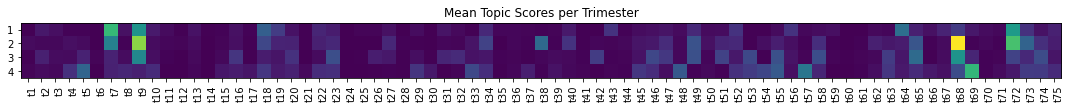

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(TrimesterMeans.values)

ax.set_xticks(np.arange(len(TrimesterMeans.columns)))
ax.set_yticks(np.arange(len(TrimesterMeans.index)))

ax.set_xticklabels(TrimesterMeans.columns)
ax.set_yticklabels(TrimesterMeans.index)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

ax.set_title("Mean Topic Scores per Trimester")
fig.tight_layout()
plt.show()

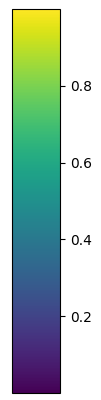